# Zakharov function
---
Description:

- Optimization (min)
- Single-objective
- Constraints (no)
---

Minimize the equation given by:

- $f\left(\mathbf{x}\right) = \sum_{i=1}^{d}x_i^2 + \left(\sum_{i=1}^{d}0.5ix_i\right)^2 + \left(\sum_{i=1}^{d}0.5ix_i\right)^4$

where: $-10 \le x_i \le 10$.

Global Minimum:

- $f\left(\mathbf{\hat{x}}\right) = 0$, at $\mathbf{\hat{x}} = [0, 0, ..., 0]$

## First we import python libraries and set up the directory of our code

In [1]:
import os, sys
import numpy as np
from math import isclose
from functools import cache

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

## Here we import all our custom PSO code

In [2]:
from star_pso.auxiliary.swarm import Swarm
from star_pso.auxiliary.particle import Particle
from star_pso.engines.standard_pso import StandardPSO
from star_pso.auxiliary.utilities import cost_function

## Define the objective function

In [3]:
@cache
def calc_indices(n: int):
    return np.arange(n)
# _end_def_

# Objective function.
@cost_function(minimize=True)
def fun_Zakharov(x: np.ndarray, **kwargs) -> tuple[float, bool]:

    # Create an array of indices.
    indices = calc_indices(len(x))

    # Compute the sum of 'i * x_i'.
    sum_xi = 0.5*np.sum(indices * x)
        
    # Compute the final value.
    f_value = np.sum(x**2) + sum_xi**2 + sum_xi**4

    # Condition for termination.
    solution_found = isclose(f_value, 0.0, rel_tol=1.0e-6)

    # Return the solution tuple.
    return f_value, solution_found
# _end_def_

## Here we set the PSO parameters

- Set the number of dimensions 'D'
- Set the number of particles 'N'
- Setup the initial population
- Create the PSO object

In [4]:
# Random number generator.
rng = np.random.default_rng()

# Define the number of optimizing variables.
D = 10

# Define the number of particles.
N = min(5*D, 100)

# Sample the initial points randomly.
X_t0 = rng.uniform(-10.0, +10.0, size=(N, D))

# Initial population.
swarm_t0 = Swarm([Particle(x) for x in X_t0])

# Create the StandardPSO object that will carry on the optimization.
test_PSO = StandardPSO(initial_swarm=swarm_t0, obj_func=fun_Zakharov,
                       x_min= -10.0, x_max= +10.0, copy=True)

## Optimization process

In [5]:
test_PSO.run(max_it = 1000,
             options = {"w0": 0.85, "c1": 1.65, "c2": 1.75, "fipso": False},
             reset_swarm = True, verbose = True, adapt_params = True)

Initial f_optimal = -387.4458
Iteration:     1 -> f_optimal = -256.7573
Iteration:   101 -> f_optimal = -2.2278
Iteration:   201 -> f_optimal = -0.0008
Iteration:   301 -> f_optimal = -0.0000
Iteration:   401 -> f_optimal = -0.0000
Iteration:   501 -> f_optimal = -0.0000
Iteration:   601 -> f_optimal = -0.0000
Iteration:   701 -> f_optimal = -0.0000
Iteration:   801 -> f_optimal = -0.0000
Iteration:   901 -> f_optimal = -0.0000
Final f_optimal = -0.0000
run: elapsed time = 28.148 seconds.


In [6]:
# Get the optimal solution from the PSO.
i_opt, f_opt, x_opt = test_PSO.get_optimal_values()

# Display the (final) optimal value.
print(f"Optimum Found: {abs(f_opt):.6f}, at iteration {i_opt}.\n")

# Display each particle position value.
for i, xi in enumerate(x_opt, start=1):
    print(f"x{i} = {xi:>10.6f}")
# _end_for_

Optimum Found: 0.000000, at iteration 999.

x1 =   0.000000
x2 =  -0.000000
x3 =  -0.000000
x4 =  -0.000000
x5 =   0.000000
x6 =   0.000000
x7 =  -0.000000
x8 =  -0.000000
x9 =   0.000000
x10 =   0.000000


### End of file

In [7]:
import matplotlib.pyplot as plt

In [8]:
test_PSO.stats.keys()

dict_keys(['f_values', 'x_opt', 'f_opt', 'inertia_w', 'cogntv_c1', 'social_c2'])

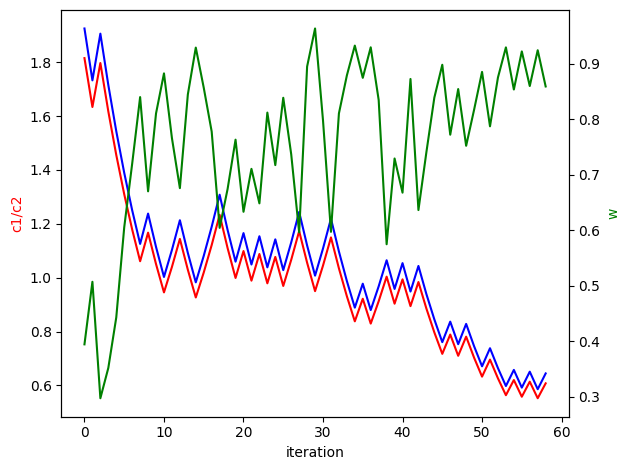

In [9]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('iteration')
ax1.set_ylabel('c1/c2', color="red")
ax1.plot(test_PSO.stats['cogntv_c1'], color="red")
ax1.plot(test_PSO.stats['social_c2'], color="blue")

ax2 = ax1.twinx()

ax2.set_ylabel('w', color="green")
ax2.plot(test_PSO.stats['inertia_w'], color="green")

fig.tight_layout()

plt.show()